## Task

Using the above dataset, Municipal Corporation in a particular city wants to construct a classification model that can label any new water sample as either safe or unsafe for drinking.
Construct such a model in Python by trying two classification algorithms - random forest and support vector classification.


In [2]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.simplefilter('ignore')

In [5]:
# Reading Data

data = pd.read_csv('/content/drive/MyDrive/Practical Assignment – Supervised Machine Learning/QualityPrediction.csv')

In [6]:
# Check first 5 rows
data.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,Safe
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,Safe
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,Unsafe
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,Safe
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,Safe


In [ ]:
data.loc[99]

aluminium       0.88
ammonia        11.12
arsenic         0.04
barium          0.92
cadmium        0.009
chloramine      4.59
chromium        0.85
copper           1.1
flouride        1.48
bacteria        0.75
viruses         0.75
lead           0.147
nitrates        8.25
nitrites        1.38
mercury        0.007
perchlorate    10.75
radium           1.2
selenium        0.02
silver          0.27
uranium         0.02
is_safe         Safe
Name: 99, dtype: object

In [7]:
# Checking rows and columns of dataset
data.shape

(7996, 21)

In [8]:
# Getting some basic information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7996 entries, 0 to 7995
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

### Data Visualization

In [9]:
# Let's first check the class distribution

data['is_safe'].value_counts()

Unsafe    7084
Safe       912
Name: is_safe, dtype: int64

In [10]:
# Let's create a Pie-Chart to graphically represent the class distribution

import plotly.graph_objects as go

labels = ['Unsafe', 'Safe']

fig = go.Figure(data=[go.Pie(labels=labels, values=data['is_safe'].value_counts().values, pull=[0, 0.05])])
fig.show()

***The majority of water samples in a dataset are unsafe, around 88.6% water samples in a dataset are unsafe whereas 11.4% water samples are safe.***

In [11]:
data.columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')

## 1. Data Preparation

#### Handling Categorical Data

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['is_safe'] = le.fit_transform(data['is_safe'])

In [13]:
data.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,0
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,0
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,1
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,0
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,0


In [14]:
## Data Splitting

X = data.drop('is_safe', axis = 1)
y = data['is_safe']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 20)

In [15]:
X_train.shape, X_test.shape

((6396, 20), (1600, 20))

## Model Building

#### 1. Support Vector Machine

In [16]:
# Support Vector Machine
from sklearn import svm
classifier = svm.SVC(kernel = 'rbf')

#fit the model
classifier.fit(X_train, y_train)

SVC()

In [17]:
# Make a prediction for the testing set
y_pred_te = classifier.predict(X_test)

In [18]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
# Making prediction on test data

pred_rf = rf.predict(X_test)

## Model Evaluation

Since, it's a binary classification task and the dataset is imbalanced so we are going to use Precision, Recall, F1-score and ROC-AUC score to evaluate the performance of the model.

In [20]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score

In [21]:
# print the Precision Score on test data

#print("Precision Score with SVM:", precision_score(y_test, y_pred_te))
print("Precision Score with Random Forest:", precision_score(y_test, pred_rf))

Precision Score with Random Forest: 0.9572881355932203


In [22]:
# print the Recall Score on test data

#print("Recall Score with SVM:", recall_score(y_test, y_pred_te))
print("Recall Score with Random Forest:", recall_score(y_test, pred_rf))

Recall Score with Random Forest: 0.995768688293371


In [23]:
# print the F1-score on test data

#print("F1-Score with SVM:", f1_score(y_test, y_pred_te))
print("F1-Score with Random Forest:", f1_score(y_test, pred_rf))

F1-Score with Random Forest: 0.9761493259592119


In [24]:
# print the AUC-score on test data

print("AUC ROC Score with SVM:", roc_auc_score(y_test, y_pred_te))
print("AUC ROC Score with Random Forest:", roc_auc_score(y_test, pred_rf))

AUC ROC Score with SVM: 0.5
AUC ROC Score with Random Forest: 0.8248074210697623


***From the above evaluation, we can observe that ROC score of SVM is 50%, which signifies that the SVM is not well fitted on model and is not able to distinguish between positive and negative class whereas the Random Forest algorithm is able to achieve an ROC-AUC score of 83.2%, which indicates the model is properly able to distunguish between positive and negative class. So, let's try to tune the hyperparameters of random forest algorithm to boost the performance of the model.***

## 2. Model Hyper Parameter Tunning

We are going to use Randomized Search CV to tune the hyperparameters of Random Forest classifier as it computationally faster as compared to another tunning methods. So, we should use such tunning method which is having good computational speed especially when we are dealing with the large data set.

In [25]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [26]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 50, 20)]

# Minimum number of samples required to split a node
min_samples_split = [5, 8, 10, 12, 15]

# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4, 6, 8, 10]


random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy', 'gini impurity']}


In [27]:
model_rscv = RandomizedSearchCV(estimator = rf, param_distributions=random_grid, n_iter = 100, cv = 5,
                                n_jobs = -1, random_state = 42)

model_rscv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy',
                                                      'gini impurity'],
                                        'max_depth': [3, 5, 7, 10, 12, 15, 17,
                                                      20, 22, 25, 27, 30, 32,
                                                      35, 37, 40, 42, 45, 47,
                                                      50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 4, 6, 8, 10],
                                        'min_samples_split': [5, 8, 10, 12, 15],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42)

In [28]:
model_rscv.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 35,
 'criterion': 'entropy'}

In [29]:
best_random = model_rscv.best_estimator_
best_random

RandomForestClassifier(criterion='entropy', max_depth=35, max_features='log2',
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=400)

In [30]:
# Making Prediction

y_pred_rf_rscv = best_random.predict(X_test)

In [31]:
print("AUC ROC Score with Random Forest:", roc_auc_score(y_test, y_pred_rf_rscv))

AUC ROC Score with Random Forest: 0.8261442365814722


## 3. Model Evaluation with AUC Score

We are going to use ROC AUC Score for the evaluation of the model as we should use it when we care equally about positive and negative classes especially in case of imbalanced data. So, since the dataset is imbalanced and we need to take care about true negatives as much as we care about true positives then it totally makes sense to use ROC AUC.

In [32]:
# Evaluation

from sklearn.metrics import confusion_matrix, classification_report
print("Precision Score: ", precision_score(y_test, y_pred_rf_rscv))
print("Recall Score: ", recall_score(y_test, y_pred_rf_rscv))
print("F1-Score: ", f1_score(y_test, y_pred_rf_rscv))
print("AUC Score: ", roc_auc_score(y_test, y_pred_rf_rscv))
print(classification_report(y_test, y_pred_rf_rscv))

Precision Score:  0.9578231292517007
Recall Score:  0.9929478138222849
F1-Score:  0.9750692520775623
AUC Score:  0.8261442365814722
              precision    recall  f1-score   support

           0       0.92      0.66      0.77       182
           1       0.96      0.99      0.98      1418

    accuracy                           0.95      1600
   macro avg       0.94      0.83      0.87      1600
weighted avg       0.95      0.95      0.95      1600



## 4. Feature Selection to avoid Overfitting

Since the dataset contains so many columns so there might be a possibility that only few columns are impacting the target variable but we are using all the feature to build the model and probably leads to overfitting. So, to avoid overfitting we can simply drop those features which are least important to build the model.

In [33]:
# view the feature scores

feature_scores = pd.Series(rf.feature_importances_, index=X_train.columns, ).sort_values(ascending=False)
feature_scores

aluminium      0.206319
cadmium        0.106589
perchlorate    0.105925
arsenic        0.075255
silver         0.049322
chloramine     0.047859
ammonia        0.047446
nitrates       0.041164
radium         0.034047
chromium       0.032821
uranium        0.032063
nitrites       0.031772
viruses        0.030885
bacteria       0.030694
barium         0.028180
copper         0.024244
lead           0.024051
flouride       0.019345
selenium       0.017696
mercury        0.014323
dtype: float64

<Axes: >

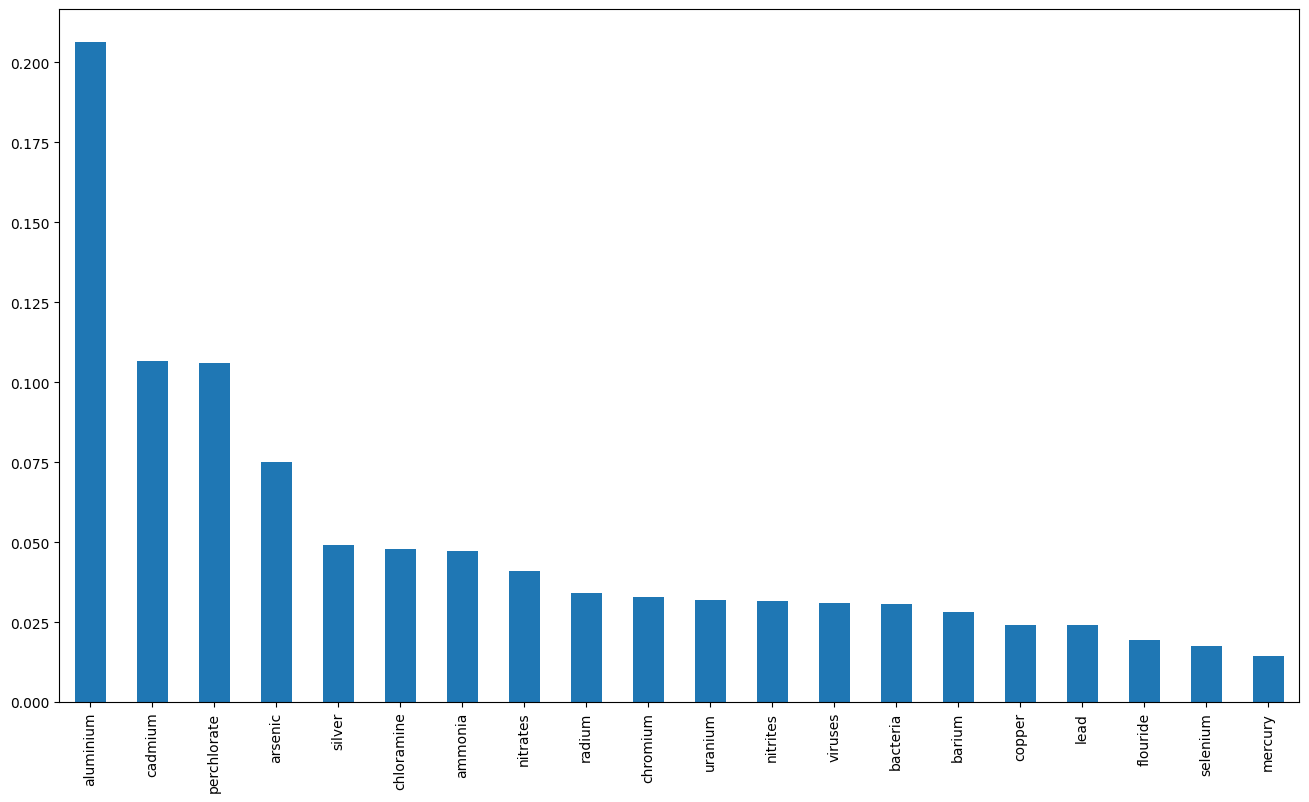

In [34]:
# Plot the bar graph to check of the features visually
feature_scores.plot(kind="bar",figsize=(16, 9))

In [35]:
X_train

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
5108,0.08,0.33,0.09,0.75,0.030,0.07,0.06,1.72,0.89,0.09,0.005,0.184,10.41,0.17,0.001,7.52,2.05,0.00,0.03,0.08
3715,0.04,15.27,0.41,2.90,0.010,2.45,0.05,0.02,1.10,1.00,1.000,0.001,8.05,1.75,0.003,28.54,3.43,0.09,0.10,0.00
4141,0.06,3.62,0.01,0.18,0.090,0.02,0.05,0.05,0.07,0.00,0.790,0.164,0.65,0.66,0.010,7.29,0.78,0.06,0.03,0.04
5110,0.06,15.77,0.06,1.52,0.050,0.17,0.04,1.67,1.21,0.00,0.650,0.042,10.59,0.73,0.005,6.11,0.18,0.06,0.07,0.05
5226,0.07,16.98,0.08,0.41,0.090,0.60,0.09,0.11,0.21,0.00,0.610,0.059,3.15,1.62,0.010,0.22,4.19,0.10,0.02,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7068,0.08,4.16,0.09,0.91,0.100,0.19,0.09,1.55,1.09,0.72,0.720,0.137,14.03,1.69,0.001,0.34,0.96,0.09,0.01,0.03
7391,0.08,14.53,0.09,0.67,0.020,0.39,0.08,0.31,0.74,0.55,0.550,0.093,8.80,2.02,0.009,7.71,6.28,0.09,0.01,0.05
4367,0.01,5.12,0.06,2.22,0.090,0.08,0.08,0.06,0.65,0.00,0.950,0.148,9.15,0.37,0.000,6.74,0.11,0.00,0.03,0.09
2522,0.06,27.94,0.02,1.45,0.001,4.36,0.17,0.85,1.21,0.40,0.002,0.103,13.06,1.74,0.001,51.02,3.83,0.07,0.20,0.03


In [36]:
X_train.columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium'],
      dtype='object')

In [37]:
# drop the least important feature from X_train and X_test

X_train = X_train.drop(labels = ['flouride', 'selenium', 'mercury'], axis =  1)
X_test = X_test.drop(labels = ['flouride', 'selenium', 'mercury'], axis = 1)

In [38]:
X_test

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,bacteria,viruses,lead,nitrates,nitrites,perchlorate,radium,silver,uranium
3671,0.14,28.73,0.89,0.33,0.110,0.11,0.31,0.06,0.41,0.008,0.001,6.14,2.17,45.70,3.52,0.27,0.08
97,2.85,23.02,0.03,2.24,0.004,0.46,0.02,1.77,0.14,0.006,0.137,14.86,1.19,27.85,7.60,0.45,0.05
5285,0.02,11.30,0.04,1.74,0.070,0.04,0.07,0.40,0.00,0.870,0.126,18.76,0.30,11.17,5.86,0.04,0.08
3830,0.20,20.25,0.48,2.52,0.050,5.28,0.74,0.04,0.53,0.530,0.105,9.16,1.31,14.18,2.76,0.44,0.07
2394,0.05,11.99,0.04,3.22,0.009,1.10,0.65,0.13,0.26,0.001,0.157,11.21,1.49,39.65,0.94,0.08,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3065,0.17,19.86,0.23,3.84,0.040,4.55,0.89,0.38,0.76,0.760,0.121,8.02,1.42,34.83,3.29,0.26,0.09
5818,0.04,28.48,0.09,3.87,0.080,0.17,0.02,1.50,0.65,0.650,0.125,14.10,0.30,11.81,1.22,0.08,0.06
6398,0.05,21.69,0.05,0.75,0.100,0.30,0.10,0.68,0.26,0.006,0.155,15.05,1.26,0.72,5.36,0.08,0.00
5098,0.06,10.20,0.06,0.17,0.090,0.32,0.08,1.10,0.00,0.750,0.147,8.72,0.71,5.15,0.78,0.03,0.02


In [39]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 700, criterion='entropy', max_depth=37,
                                             min_samples_split = 5, min_samples_leaf = 1, max_features= 'log2')
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=37, max_features='log2',
                       min_samples_split=5, n_estimators=700)

In [40]:
# Making Prediction

y_pred_rf_sel = model.predict(X_test)

In [41]:
# Evaluation

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_auc_score, auc
print("Precision Score: ", precision_score(y_test, y_pred_rf_sel))
print("Recall Score: ", recall_score(y_test, y_pred_rf_sel))
print("F1-Score: ", f1_score(y_test, y_pred_rf_sel))
print("AUC Score: ", roc_auc_score(y_test, y_pred_rf_sel))
print(classification_report(y_test, y_pred_rf_sel))

Precision Score:  0.9585316111488783
Recall Score:  0.9943582510578279
F1-Score:  0.9761163032191068
AUC Score:  0.8295967079464964
              precision    recall  f1-score   support

           0       0.94      0.66      0.78       182
           1       0.96      0.99      0.98      1418

    accuracy                           0.96      1600
   macro avg       0.95      0.83      0.88      1600
weighted avg       0.96      0.96      0.95      1600



### Plot the ROC curve

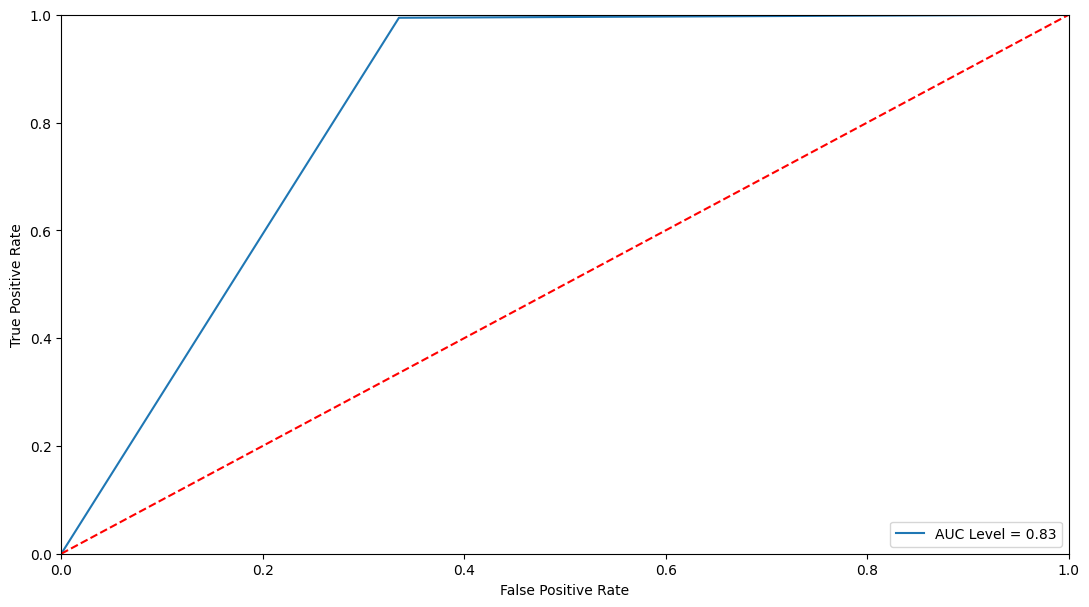

In [42]:
from sklearn import metrics

plt.figure(figsize = (13, 7))
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred_rf_sel)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate,label='AUC Level = %0.2f' % (roc_auc))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 5. Result Analysis

***a). Out of these two classification models, we can recommend Random Forest for deployment in the real-world.***

***b). Yes, SVM is underfitting and possible reason for this behaviour of the model is that the data is imbalanced and the model might not able to learn the pattern present in the minority class.***

In [ ]:
# Save the Model
import pickle
pickle_out = open("/content/drive/MyDrive/Practical Assignment – Supervised Machine Learning/Water_Quality_Prediction_System.pkl", mode = "wb")
pickle.dump(model, pickle_out)
pickle_out.close()